# HOG를 이용한 특성 추출
- [참고](https://www.thepythoncode.com/article/hog-feature-extraction-in-python)

In [1]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
from tqdm.notebook import tqdm

(48, 48)


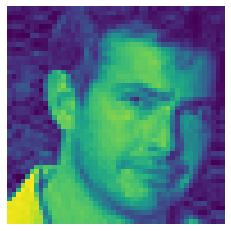

In [30]:
img = imread('../data/FER2013/train/angry/Training_10120469.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

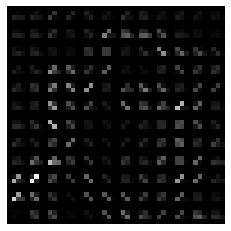

In [31]:
#creating hog features
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [ ]:
# save the images
plt.imsave("hog_image.jpg", hog_image, cmap="gray")

In [2]:
# train 폴더 변환
path_dir = '../data/FER2013/HE/train'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/FER2013/HE_HOG/train/{fname}/{iname.split('.')[0]}.jpg", 
                   hog_image, cmap="gray")

  0%|          | 0/3995 [00:00<?, ?it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

  0%|          | 0/4097 [00:00<?, ?it/s]

  0%|          | 0/7215 [00:00<?, ?it/s]

  0%|          | 0/4965 [00:00<?, ?it/s]

  0%|          | 0/4830 [00:00<?, ?it/s]

  0%|          | 0/3171 [00:00<?, ?it/s]

In [3]:
# validation 폴더 변환
path_dir = '../data/FER2013/HE/test/'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, 
                            # multichannel=True
                           )
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/FER2013/HE_HOG/test/{fname}/{iname.split('.')[0]}.jpg", 
                   hog_image, cmap="gray")

  0%|          | 0/958 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1774 [00:00<?, ?it/s]

  0%|          | 0/1233 [00:00<?, ?it/s]

  0%|          | 0/1247 [00:00<?, ?it/s]

  0%|          | 0/831 [00:00<?, ?it/s]

# HOG를 이용한 학습

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import EfficientNetB3, ResNet50

In [5]:
base_dir = '../data/FER2013/HE_HOG'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1/255,    
#     rotation_range=40,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
## 다른 모델

model = Sequential()
model.add(Conv2D(64, (1, 1), padding='same', activation='relu', 
                 input_shape=(112, 112, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      128       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 256)     8

In [8]:
## 다른 모델 논문 참고 모델
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)      

In [10]:
history = model.fit(train_generator, steps_per_epoch=280, epochs=40,
                    validation_data=validation_generator,
                    validation_steps=71)

Epoch 1/40
280/280 [==============================] - 13s 48ms/step - loss: 0.6510 - accuracy: 0.7604 - val_loss: 1.4221 - val_accuracy: 0.5513
Epoch 2/40
280/280 [==============================] - 13s 47ms/step - loss: 0.6200 - accuracy: 0.7710 - val_loss: 1.4273 - val_accuracy: 0.5628
Epoch 3/40
280/280 [==============================] - 13s 47ms/step - loss: 0.5963 - accuracy: 0.7809 - val_loss: 1.4920 - val_accuracy: 0.5538
Epoch 4/40
280/280 [==============================] - 13s 47ms/step - loss: 0.5692 - accuracy: 0.7914 - val_loss: 1.4763 - val_accuracy: 0.5631
Epoch 5/40
280/280 [==============================] - 13s 47ms/step - loss: 0.5323 - accuracy: 0.8044 - val_loss: 1.5134 - val_accuracy: 0.5579
Epoch 6/40
280/280 [==============================] - 14s 48ms/step - loss: 0.5070 - accuracy: 0.8149 - val_loss: 1.5181 - val_accuracy: 0.5549
Epoch 7/40
280/280 [==============================] - 13s 48ms/step - loss: 0.4799 - accuracy: 0.8240 - val_loss: 1.5684 - val_accuracy: